# CUNY 620 Homework Week 5 Part 2

**Team 2: Pavan Akula, Nathan (Seoungyoon) Lim, Christophe Hunt, Joel Park, Ilya Kats**

Loading the data from the website into Jupyter Notebook.

**Assignment**

It can be useful to be able to classify new "test" documents using already classified "training" documents. A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.

Here is one example of such data: http://archive.ics.uci.edu/ml/datasets/Spambase

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

**Data Import and Setup**

**Downloading and Importing Data**

In [9]:
# Loading libraries

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [10]:
#Reference: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
#Irvine, CA: University of California, School of Information and Computer Science.
#Loading data from zip file

import urllib, os, zipfile, glob

open('spambase.zip', 'wb').write(urllib.urlopen(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.zip').read())

In [11]:
zip_ref = zipfile.ZipFile(os.path.realpath('spambase.zip'), 'r')
zip_ref.extractall(os.path.realpath(''))
zip_ref.close()

In [12]:
# load category names using regular expressions
# Code modified from: http://www.pythonlearn.com/html-007/cfbook012.html

import re

categories = []

hand = open('spambase.names')
for line in hand:
    if not re.match(r'\|', line):
        line = line.rstrip()
        if re.search(r'(word_freq_|char_freq_|capital_run_).+', line):   
            temp_line = line.split()
            categories.append(temp_line[0])
hand.close()

categories.append('spam')

In [13]:
# Convert data file into CSV format.
# Code modified from: https://stackoverflow.com/questions/39642082/convert-txt-to-csv-python-script

import csv

with open('spambase.data') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('spambase.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(categories)
        writer.writerows(lines)

In [14]:
# Load data

balance_data = pd.read_csv('spambase.csv', sep = ',')

**Categories**

In [15]:
categories

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

What do the categories mean here? Let's take a look at documentation that came in the zip file.

**Relevant Information:** The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

**Attribute Information:** The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file.

**Attribute definitions:**

* **word_freq_WORD** (48 attributes; continuous real [0,100]) - percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* **char_freq_CHAR** (6 attributes; continuous real [0,100]) - percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail.

* **capital_run_length_average** (continuous real [1,...]) - average length of uninterrupted sequences of capital letters.

* **capital_run_length_longest** (continuous integer [1,...]) - length of longest uninterrupted sequence of capital letters.

* **capital_run_length_total** (continuous integer [1,...]) - sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail.

* **spam** (nominal {0,1}) - denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

**Data Summary**

* Number of Instances: "4,601 (1,813 Spam = 39.4%)"

* Number of Attributes: "58 (57 continuous, 1 nominal class label)"

* Missing Attribute Values: "None"

* Class Distribution:

    * Spam: 1,813 (39.4%)
    * Non-Spam: 2,788 (60.6%)

In [16]:
# Creating a decision tree algorithm using scikit
# Code modified from:
# http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

In [17]:
# Checking the length and dimensions of our dataframe

print "Dataset Length:: ", len(balance_data)
print "Dataset Shape:: ", balance_data.shape

Dataset Length::  4601
Dataset Shape::  (4601, 58)


In [18]:
# Listing the first 5 observations in this data.

balance_data.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Data Slicing:** Spliting the data into train and test tests.

Let's create an "X" set that consists of predictor variables (1st column to the 57th column), and then create a "Y" set which consists of the outcome variable. We are using ".values" of numpy converting our dataframes into numpy arrays

In [27]:
X = balance_data.values[:, 0:57]
Y = balance_data.values[:, 57]

# Splitting the data into training and test set
# X_train and Y_train are for training
# X_test and Y_test are for testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

Parameter test_size is given value 0.3. It means test set will be 30% of the whole dataset and training set will be 70%. Parameter random_state is a pseudo-random number generator state used for random sampling.

# Decision Tree Training

Now we fit Decision tree algorithm on training data, predicting labels for validation dataset and printing the accuracy of the model using various parameters.

In [28]:
# Decision Tree Classifier with Criterial Gini Index
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [29]:
# Decision Tree with criterial information gain (entropy)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

# Tree Visualization

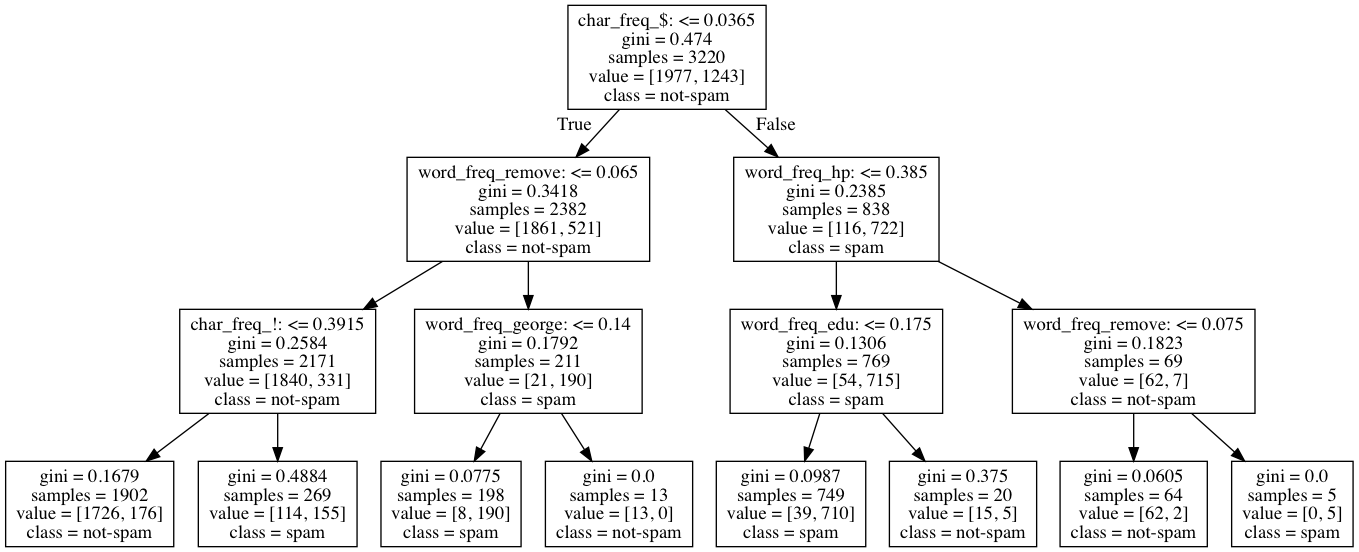

In [30]:
# Visualize the Gini impurity model using graphviz
# Code modified from:
# https://stackoverflow.com/questions/39956430/plotting-decision-tree-graphvizm-pydotplus

import graphviz
import pydotplus
from IPython.display import Image 

# Gini model
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=categories[0:57], 
                                class_names=['not-spam', 'spam']) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

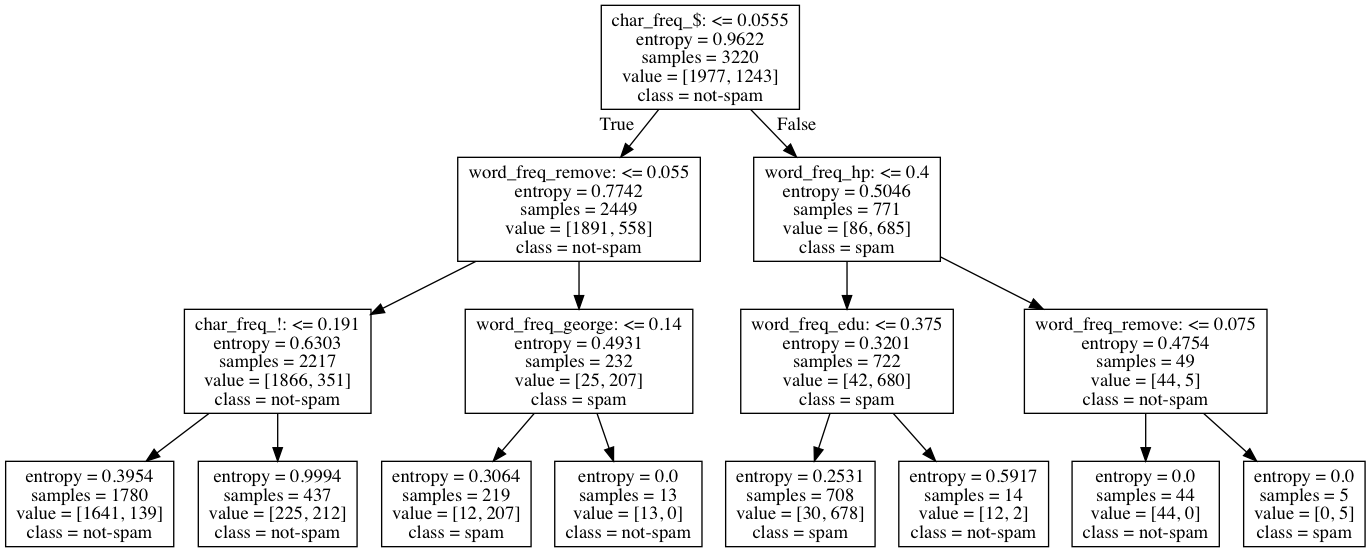

In [31]:
# Information Gain (entropy) model
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=categories[0:57],
                                class_names=['not-spam', 'spam'])
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

# Prediction

Let's see how both models do with the test sets.

In [35]:
Y_pred_gini = clf_gini.predict(X_test)
Y_pred_gini

array([ 0.,  1.,  0., ...,  0.,  1.,  0.])

In [36]:
Y_pred_en = clf_entropy.predict(X_test)
Y_pred_en

array([ 0.,  1.,  0., ...,  0.,  1.,  0.])

# Calculating Accuracy Score

In [37]:
# Calculating the accuracy for decision tree classifier with criterion as gini index

print accuracy_score(Y_test, Y_pred_gini)

0.884866039102


In [38]:
from sklearn.metrics import confusion_matrix

print confusion_matrix(Y_test, Y_pred_gini)

[[739  72]
 [ 87 483]]


The gini impurity model has an accuracy of 88.49%. Out of 811 non-spam messages, it miscategorized 72 messages (error rate of 8.88%). Out of 570 spam messages, it miscategorized 87 messages (error rate of 15.26%).

In [39]:
# Calculating the accuracy for decision tree classifier with criterion as information gain (entropy)

print accuracy_score(Y_test, Y_pred_en)

0.858797972484


In [40]:
print confusion_matrix(Y_test, Y_pred_en)

[[783  28]
 [167 403]]


The information gain (entropy) model has an accuracy of 85.88%. Out of 811 non-spam messages, it miscategorized 28 messages (error rate of 3.45%). Out of 570 spam messages, it miscategorized 167 messages (error rate of 29.3%).

**Results:** It appears that the gini impurity model is more accurate when it comes to idetifying spam messages, but it comes at expense of miscategorizing some valid messages as spam. The information gain model on the other hand is more accurate in identifying non-spam messages, but at the expense of letting more spam through.

# K Nearest Neighbors Classifier

Let's try another classifier - k Nearest Neighbors (kNN). In its simplest form, if given a new observation, it finds the observation from the training set with the closest feature vector

In [262]:
# http://scikit-learn.org/stable/modules/tree.html

In [41]:
# Training

import numpy as np

np.random.seed(0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
# Prediction
knn_pred = knn.predict(X_test)
knn_pred

array([ 1.,  0.,  0., ...,  0.,  1.,  1.])

In [44]:
# Accuracy
print accuracy_score(Y_test, knn_pred)

0.790731354091


In [45]:
print confusion_matrix(Y_test, knn_pred)

[[682 129]
 [160 410]]


The kNN model has an accuracy of 79.07%. Out of 811 non-spam messages, it miscategorized 129 messages (error rate of 15.9%). Out of 570 spam messages, it miscategorized 160 messages (error rate of 28.07%).

**Results:** The kNN model is similar to the information gain model in identifying spam messages, but it is noticeably worse in identifying non-spam messages. It appears that both decision tree models are more accurate than the kNN model.

# Support Vector Machines

Support Vector Machines (SVM) belong to the discriminant model family. They try to find a combination of samples to build a plane maximizing the margin between the two classes.

In [46]:
# Training

from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
# Prediction
svm_pred = svm_model.predict(X_test)
svm_pred

array([ 0.,  1.,  0., ...,  0.,  1.,  1.])

In [48]:
# Accuracy
print accuracy_score(Y_test, svm_pred)

0.821868211441


In [49]:
print confusion_matrix(Y_test, svm_pred)

[[692 119]
 [127 443]]


The SVM model has an accuracy of 82.19%. Out of 811 non-spam messages, it miscategorized 119 messages (error rate of 14.67%). Out of 570 spam messages, it miscategorized 127 messages (error rate of 22.28%).

**Results:** The SVM model numbers are somewhat similar to the kNN model numbers. Decision tree models are still more accurate.

# Conclusion

The data was generated in 1999. It is possible, even likely, that the criteria used to determine what is considered spam has changed in the past 18 years. Spam creators routinely change strategy in order to beat known identification techniques. It is likely that any of the developed model will perform noticeably different with present day messages.

The data was derived from creators' work and personal messages. As such they contain features that may not be as descriptive for general population. For example, frequency of words 'george' and '650' is probably not a good indicator for spam for somebody not named George and who does not live in the San Francisco Bay Area (area code 650).

Decision Tree models seems to perform better than the k-Nearest Neighbors or Support Vector Machines models for the test set. Both DT models use the same features, but different cutoff values. Common features are frequencies of dollar signs, exclamation points, word 'remove' and a few other words. Leaf nodes are similar between models with one exception - messages with low frequency of dollar signs, low frequency of 'remove' and high frequency of exclamation signs are considered spam when evaluating DT using gini index and not-spam when using entropy.

When picking a model it is also important to consider whether type I or type II errors are more critical to the project. DT entropy model is more conservative - it more accurately predicts non-spam messages, but also lets more spam into the inbox. DT gini index model is more aggressive - it lets less spam into the inbox, but also blocks more non-spam messages.